In [1]:
import sys

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

In [2]:
print("Installing dependencies for Colab environment")
!pip install -Uq grpcio==1.32.0

Installing dependencies for Colab environment


In [3]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Data Science/resnet50_gar.h5')

In [4]:
model

In [5]:
import tempfile

In [6]:
MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

export_path = /tmp/1



In [7]:
tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

INFO:tensorflow:Assets written to: /tmp/1/assets


In [8]:
print('\nSaved model:')
!ls -l {export_path}


Saved model:
total 3212
drwxr-xr-x 2 root root    4096 Dec 21 01:59 assets
-rw-r--r-- 1 root root 3277694 Dec 21 01:59 saved_model.pb
drwxr-xr-x 2 root root    4096 Dec 21 01:59 variables


In [9]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, -1, -1, 3)
        name: serving_default_input_1:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 6)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
W1221 02:00:35.891726 140397180946304 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/res

In [10]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  14715      0 --:--:-- --:--:-- --:--:-- 14641
OK
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos

In [11]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 59 not upgraded.
Need to get 223 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.4.0 [223 MB]
Fetched 223 MB in 3s (71.7 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.4.0_all.deb ...
Unpacking tensorflow-model-server (2.4.0) ...
Setting up tensorflow-model-server (2.4.0) ...


In [12]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [13]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=fashion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [14]:
!tail server.log

2020-12-21 02:01:42.504984: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:206] Restoring SavedModel bundle.
2020-12-21 02:01:42.520626: I external/org_tensorflow/tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200000000 Hz
2020-12-21 02:01:42.994621: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:190] Running initialization op on SavedModel bundle at path: /tmp/1
2020-12-21 02:01:43.102041: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:277] SavedModel load for tags { serve }; Status: success: OK. Took 757711 microseconds.
2020-12-21 02:01:43.119481: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /tmp/1/assets.extra/tf_serving_warmup_requests
2020-12-21 02:01:43.119646: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: fashion_model version: 1}
2020-12-21 02:01:43.123222: I tensorflow_serving/model_servers/server.cc:371]

In [66]:
from PIL import Image

def process_img(x):
    img1 = Image.open(x).convert(mode="RGB")
    array1 = np.array(img1.getdata())
    img_np_array = np.reshape(array1, (256,256,3))
    
    plt.imshow(img_np_array.astype(int))
    return np.expand_dims(img_np_array, axis=0)

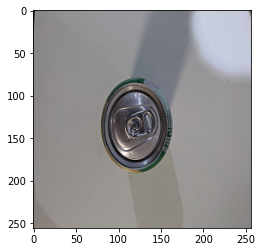

In [71]:
a = process_img('/can3.jpg')

In [72]:
import json
data = json.dumps({"signature_name": "serving_default", "instances": a.tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ... 132, 131, 129], [131, 130, 128], [130, 129, 125]]]]}


In [73]:
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [74]:
!pip install -q requests

import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model:predict', data=data, headers=headers)

predictions = json.loads(json_response.text)['predictions']
print('preds:', predictions)
print('answer:', class_names[np.argmax(predictions)])

preds: [[1.18590942e-05, 0.360786498, 0.629159808, 4.86483077e-05, 0.0098388521, 0.000154257461]]
answer: metals
